In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import os
import re
import json
import requests
import time
import sys
import traceback
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
import math
import seaborn as sns
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import lightgbm as lgbm
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib
from sklearn.preprocessing import Normalizer


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = np.load("/content/drive/My Drive/data_train2.npy", allow_pickle=True) 

In [ ]:
xtrain, ytrain = train[:,:-1], train[:,-1]

[]

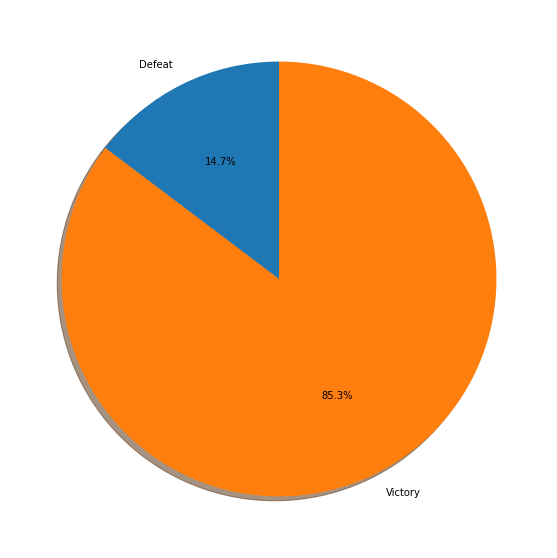

In [ ]:
sizes = [np.count_nonzero(np.where(ytrain==0)), np.count_nonzero(np.where(ytrain==1))]
labels = ["Defeat", "Victory"]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.plot()


Warning : the dataset is unbalanced

### Getting ship names

In [ ]:
ships_name = ['AL Montpelier',
 'California',
 'Alaska',
 'Wukong',
 '[Moskva]',
 'Kirov',
 'Smolensk',
 'Lappland',
 'AL Yukikaze',
 'ARP Myōkō',
 'Yoshino',
 'Flint',
 'Ark Royal',
 'Lenin',
 'Varyag',
 'Atago B',
 'Shinonome',
 'Eastern Dragon',
 'Cossack',
 'Ochakov',
 'AL Sov. Rossiya',
 'Ignis Purgatio',
 '[Zaō]',
 'London',
 'Jean Bart',
 'Z-35',
 'DD R-10',
 'Kaga',
 '[Shimakaze]',
 'Black',
 'Nelson',
 '[Hindenburg]',
 'Tirpitz B',
 'Admiral Makarov',
 'ARP Takao',
 '[Audacious]',
 '[Midway]',
 '[Großer Kurfürst]',
 'Asashio',
 'Friesland',
 'Hayate',
 'ARP Ashigara',
 'Ragnarok',
 'ARP Kirishima',
 'Graf Zeppelin',
 'ARP Haguro',
 'Arashi',
 'Shikishima',
 'Somers',
 'Gorizia',
 'Borodino',
 'Stalingrad',
 'ARP Nachi',
 'Anchorage',
 '[Gearing]',
 'Texas',
 'Pyotr Bagration',
 'AL Littorio',
 'Champagne',
 'Graf Zeppelin B',
 'Salem',
 'HSF Admiral Graf Spee',
 '[Hakuryū]',
 'Slava',
 'Duke of York',
 'ARP Hiei',
 'Georgia',
 'Ohio',
 'Småland',
 'Boise',
 'STALINGRAD #2',
 'Scharnhorst B',
 'Azuma',
 'ARP Haruna',
 'ARP Kongō',
 'Enterprise',
 'Bourgogne',
 '[Yamato]',
 'Southern Dragon',
 'Puerto Rico',
 'Lazo',
 'Sims B',
 'Massachusetts',
 'V. I. Lenin',
 'Asashio B',
 '[Montana]',
 'Ägir',
 '[Conqueror]',
 'Massachusetts B',
 'Paolo Emilio',
 'Colbert',
 'Alabama ST',
 'Alaska B',
 'Mainz',
 'Thunderer',
 'Saipan',
 'Neustrashimy',
 '[Grozovoi]',
 'Mikoyan',
 'HSF Harekaze',
 'Yahagi',
 'Gallant',
 'Bajie',
 'Riga',
 'Tallinn',
 'Alexander Nevsky',
 'Błyskawica',
 'Yūdachi',
 'Yūgumo',
 'Vanguard',
 'Poltava',
 'Katori',
 'Harugumo',
 'Kii',
 'Campbeltown',
 'Huanghe',
 'Leningrad',
 'Viribus Unitis',
 'Musashi',
 'Ashitaka',
 'Goliath',
 'Cheshire',
 'T-61',
 'König Albert',
 'Charleston',
 'Giulio Cesare',
 'Kagerō',
 'Kotovsky',
 'Hood',
 'Roma',
 'Prinz Eugen',
 'Hill',
 'Okhotnik',
 'Shiratsuyu',
 'Haida',
 'Indomitable',
 'Aigle',
 'Pommern',
 'Kronshtadt',
 'Missouri',
 'Exeter',
 'Erich Loewenhardt',
 'Mutsu',
 'Perth',
 'Mikhail Kutuzov',
 'Leone',
 'Belfast',
 'Alabama',
 'Audacious',
 'Duca degli Abruzzi',
 'Genova',
 'W. Virginia 1941',
 'Bayard',
 'Kidd',
 'Molotov',
 'Kitakaze',
 'Gascogne',
 'Z-39',
 'Wichita',
 'Siroco',
 'Siegfried',
 'Kiev',
 'Krasny Krym',
 'Arizona',
 'München',
 'De Grasse',
 'Orkan',
 'Nueve de Julio',
 'Seattle',
 'Odin',
 'Franklin D. Roosevelt',
 'Admiral Graf Spee',
 'Dunkerque',
 'Loyang',
 'Vampire',
 'Grozovoi',
 'Oleg',
 'Worcester',
 'Petropavlovsk',
 'Indianapolis',
 'Marceau',
 'Anshan',
 'Ognevoi',
 'Prinz Eitel Friedrich',
 'Cleveland',
 'Drake',
 'Siliwangi',
 'Dreadnought',
 'Minsk',
 'Oktyabrskaya Revolutsiya',
 "Duca d'Aosta",
 'Monaghan',
 'Le Terrible',
 'Smith',
 'Albemarle',
 'Irian',
 'Emden',
 'Scharnhorst',
 'Benham',
 'Tashkent',
 'Surrey',
 'Yueyang',
 'Moskva',
 'Budyonny',
 'Podvoisky',
 'Östergötland',
 'Akizuki',
 'Hatsuharu',
 'Buffalo',
 'Kléber',
 'Icarus',
 'Minotaur',
 'Manfred von Richthofen',
 'Sinop',
 'Baltimore',
 'Daring',
 'Hawkins',
 'Fiji',
 'Edinburgh',
 'Z-52',
 'Z-46',
 'August von Parseval',
 'Ryūjō',
 'Pensacola',
 'Monarch',
 'Vauquelin',
 'Yorck',
 'Hermes',
 'Leander',
 'Großer Kurfürst',
 'Leberecht Maass',
 'Dmitri Donskoi',
 'Halland',
 'Hakuryū',
 'Henri IV',
 'Weser',
 'Ernst Gaede',
 'Chung Mu',
 'Chapayev',
 'Queen Elizabeth',
 'Shōkaku',
 'Saint-Louis',
 'Venezia',
 'Hindenburg',
 'Trento',
 'Amalfi',
 'Shchors',
 'Öland',
 'Neptune',
 'Brindisi',
 'Charles Martel',
 'Gnevny',
 'Normandie',
 'Akatsuki',
 'Guépard',
 'Z-23',
 'Algérie',
 'New Orleans',
 'King George V',
 'Mogador',
 'Admiral Hipper',
 'Kremlin',
 'Västerås',
 'Fubuki',
 'La Galissonnière',
 'Skåne',
 'Alsace',
 'Sovetsky Soyuz',
 'Roon',
 'République',
 'Midway',
 'Nürnberg',
 'Richelieu',
 'Hsienyang',
 'Vladivostok',
 'Conqueror',
 'Helena',
 'Jutland',
 'Implacable',
 'Friedrich der Große',
 'Fushun',
 'Izmail',
 'Ranger',
 'Lyon',
 'Lightning',
 'Gadjah Mada',
 'Bismarck',
 'Jianwei',
 'Lion',
 'Bayern',
 'Zara',
 'Le Fantasque',
 'Lexington',
 'Jervis',
 'Furious',
 'Gneisenau',
 'Dallas',
 'Udaloi',
 'Khabarovsk',
 'Devonshire',
 'Mogami',
 'Bretagne',
 'Shenyang',
 'Novik',
 'Svietlana',
 'Visby',
 'Kamikaze R',
 'Myōkō',
 'Benson',
 'Amagi',
 'New Mexico',
 'Acasta',
 'König',
 'Longjiang',
 'Knyaz Suvorov',
 'Gryf',
 'Tenryū',
 'Medea',
 'Wakeful',
 'Kamikaze',
 'Eritrea',
 'Izumo',
 'Fūjin',
 'Atago',
 'Mikasa',
 'Weymouth',
 'Valkyrie',
 'V-25',
 'Mutsuki',
 'Marblehead Lima',
 'Hōshō',
 'Fletcher',
 'Bellerophon',
 'Karlsruhe',
 'Kaiser',
 'Izyaslav',
 'Tachibana Lima',
 'Chikuma',
 'Arkansas Beta',
 'Jaguar',
 'Emerald',
 'Rhein',
 'Hashidate',
 'Zaō',
 'Nagato',
 'North Carolina',
 'Bourrasque',
 'Danae',
 'T-22',
 'Shimakaze',
 'Nino Bixio',
 'Storozhevoi',
 'Taranto',
 'Gearing',
 'Caledon',
 'Diana Lima',
 'Turenne',
 'V-170',
 'Phoenix',
 'G-101',
 'Enseigne Gabolde',
 'Königsberg',
 'Des Moines',
 'Iowa',
 'Black Swan',
 'Jurien de la Gravière',
 'Romulus',
 'Fusilier',
 'Nassau',
 'Nicholas',
 'Émile Bertin',
 'Langley',
 'Iron Duke',
 'Courbet',
 'Kuma',
 'Alberto di Giussano',
 'Bogatyr',
 'Klas Horn',
 'Wakatake',
 'Sims',
 'Yamato',
 'Ibuki',
 'Montana',
 'Friant',
 'Clemson',
 'Orlan',
 'Tátra',
 'Phra Ruang',
 'Kolberg',
 'Orion',
 'Pyotr Velikiy',
 'Raimondo Montecuccoli',
 'Iwaki Alpha',
 'Duguay-Trouin',
 'Bougainville',
 'Marblehead',
 'Chengan',
 'Wickes',
 'Derzki',
 'Gangut',
 'Farragut',
 'Fusō',
 'Mahan',
 'Murmansk',
 'Diana',
 'Isokaze',
 'Tachibana',
 'Yūbari',
 'Atlanta',
 'New York',
 'Erie',
 'Chester',
 'Tirpitz',
 'Dresden',
 'Imperator Nikolai I',
 'Aurora',
 'Furutaka',
 'Ishizuchi',
 'Aoba',
 'St.\xa0Louis',
 'South Carolina',
 'Wyoming',
 'Warspite',
 'Kawachi',
 'Kongō',
 'Hermelin',
 'Sampson',
 'Umikaze',
 'Myōgi',
 'Colorado',
 'Albany',
 'Omaha',
 'Gremyashchy',
 'Minekaze']

### Getting right labels

In [ ]:
labels = [f"T1_{ship.replace(' ', '')}" for ship in ships_name] + ["T1_meanXP", "T1_maxXP", "T1_meanWR", "T1_maxWR"] + [f"T2_{ship.replace(' ', '')}" for ship in ships_name] + ["T2_meanXP", "T2_maxXP", "T2_meanWR", "T2_maxWR", "Victory"]

In [ ]:
df = pd.DataFrame(data=train, columns=labels)

In [ ]:
df

,T1_ALMontpelier,T1_California,T1_Alaska,T1_Wukong,T1_[Moskva],T1_Kirov,T1_Smolensk,T1_Lappland,T1_ALYukikaze,T1_ARPMyōkō,T1_Yoshino,T1_Flint,T1_ArkRoyal,T1_Lenin,T1_Varyag,T1_AtagoB,T1_Shinonome,T1_EasternDragon,T1_Cossack,T1_Ochakov,T1_ALSov.Rossiya,T1_IgnisPurgatio,T1_[Zaō],T1_London,T1_JeanBart,T1_Z-35,T1_DDR-10,T1_Kaga,T1_[Shimakaze],T1_Black,T1_Nelson,T1_[Hindenburg],T1_TirpitzB,T1_AdmiralMakarov,T1_ARPTakao,T1_[Audacious],T1_[Midway],T1_[GroßerKurfürst],T1_Asashio,T1_Friesland,...,T2_Gangut,T2_Farragut,T2_Fusō,T2_Mahan,T2_Murmansk,T2_Diana,T2_Isokaze,T2_Tachibana,T2_Yūbari,T2_Atlanta,T2_NewYork,T2_Erie,T2_Chester,T2_Tirpitz,T2_Dresden,T2_ImperatorNikolaiI,T2_Aurora,T2_Furutaka,T2_Ishizuchi,T2_Aoba,T2_St. Louis,T2_SouthCarolina,T2_Wyoming,T2_Warspite,T2_Kawachi,T2_Kongō,T2_Hermelin,T2_Sampson,T2_Umikaze,T2_Myōgi,T2_Colorado,T2_Albany,T2_Omaha,T2_Gremyashchy,T2_Minekaze,T2_meanXP,T2_maxXP,T2_meanWR,T2_maxWR,Victory
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1003.136483,1812.257939,0.472757,0.531476,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1053.847161,1165.740215,0.478563,0.511711,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1096.544813,1616.560146,0.482511,0.542745,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1006.408591,1342.942667,0.493969,0.561660,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1006.408591,1342.942667,0.493969,0.561660,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1410.609217,1881.689429,0.543041,0.586109,1.0
16094,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1036.040097,1587.646787,0.488682,0.551029,0.0
16095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, stratify=ytrain, test_size=0.10, random_state=42)


In [ ]:
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

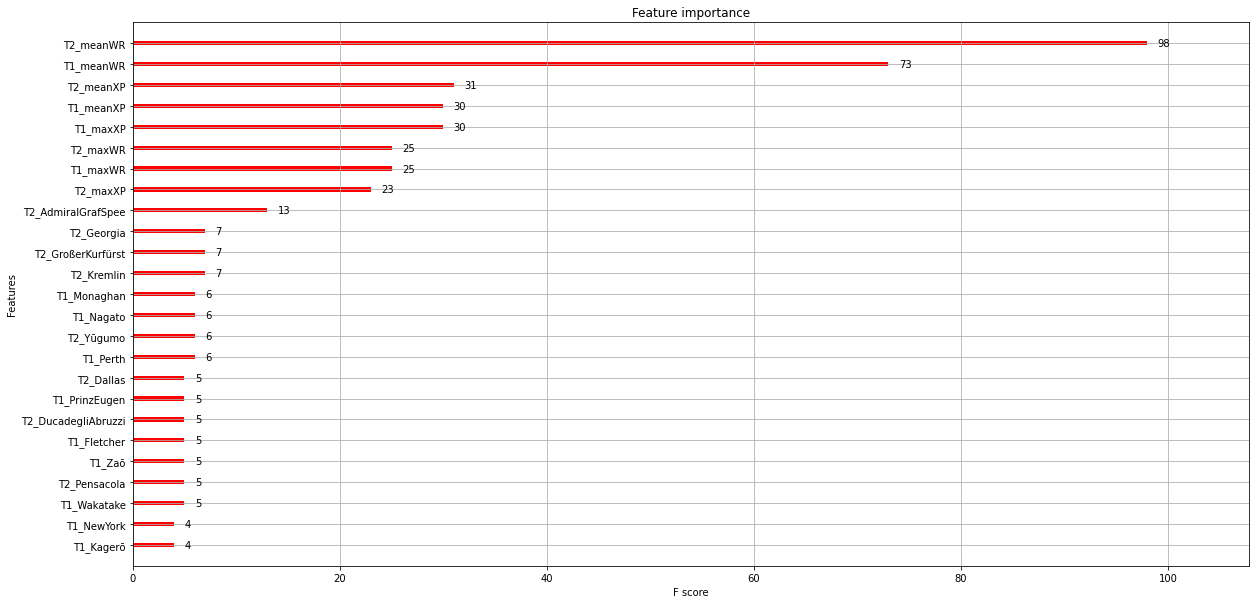

In [ ]:
xgboost_model.get_booster().get_fscore()
mapper = {'f{0}'.format(i): v for i, v in enumerate(labels)}
mapped = {mapper[k]: v for k, v in xgboost_model.get_booster().get_fscore().items()}
mapped
xgb.plot_importance(mapped, color='red', max_num_features=25)


In [ ]:
accuracy_score(y_test, xgboost_model.predict(X_test))

0.8527950310559006

Test_PCA

In [ ]:
xtrain_std = StandardScaler().fit_transform(X_train)
pca = PCA()
principalComponents = pca.fit_transform(xtrain_std)

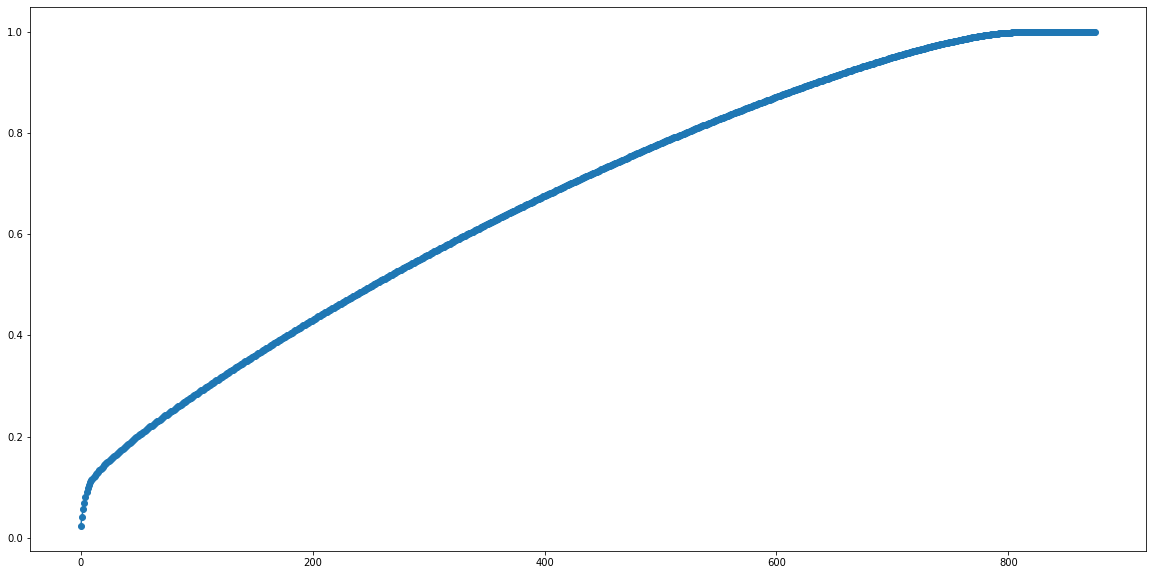

In [ ]:
plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), marker="o")

In [ ]:
pca = PCA(n_components = 0.95)
principalComponents = pca.fit_transform(xtrain_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [f'principal component {i}' for i in range(len(pca.explained_variance_ratio_))])


In [ ]:
principalDf

,principal component 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,principal component 21,principal component 22,principal component 23,principal component 24,principal component 25,principal component 26,principal component 27,principal component 28,principal component 29,principal component 30,principal component 31,principal component 32,principal component 33,principal component 34,principal component 35,principal component 36,principal component 37,principal component 38,principal component 39,...,principal component 662,principal component 663,principal component 664,principal component 665,principal component 666,principal component 667,principal component 668,principal component 669,principal component 670,principal component 671,principal component 672,principal component 673,principal component 674,principal component 675,principal component 676,principal component 677,principal component 678,principal component 679,principal component 680,principal component 681,principal component 682,principal component 683,principal component 684,principal component 685,principal component 686,principal component 687,principal component 688,principal component 689,principal component 690,principal component 691,principal component 692,principal component 693,principal component 694,principal component 695,principal component 696,principal component 697,principal component 698,principal component 699,principal component 700,principal component 701
0,-4.969813,3.545445,-4.498671,2.399757,-0.300067,-0.670255,-0.551257,0.763046,0.293423,2.795242,-0.128570,0.080767,-2.278216,0.398923,-0.275439,1.140749,0.387470,-0.143639,0.285255,1.431868,2.702409,0.247008,-0.063434,-0.427636,-0.443536,0.395116,0.086351,-0.118099,0.378900,0.114734,0.809283,-0.195764,-0.313333,0.729365,-0.060992,0.335926,0.557768,-0.208258,0.072646,0.356920,...,-1.294760,1.568571,-0.842023,-0.267366,-0.479128,0.648781,0.750309,0.182130,0.046921,0.381877,-1.190104,-0.459745,-0.570240,-0.020899,0.336980,0.789045,-0.215326,0.217431,-0.243609,1.341419,-0.541618,0.873076,-0.330958,0.160640,-0.510080,-0.345008,-0.967139,-0.176361,0.272480,0.546028,0.600008,1.422440,0.599563,-0.056589,0.638125,0.854148,-0.187984,0.473224,0.436353,1.040875
1,2.625236,2.599786,1.383465,0.724140,0.125981,-1.824924,-2.195298,-0.809216,-0.544289,2.537819,-0.528413,0.844284,0.921778,0.151783,1.243921,-0.461727,2.576441,-2.308123,-1.119432,0.160696,-2.536520,3.763335,-1.060875,-1.007833,-1.031785,-0.412981,-0.808179,0.825854,-1.390512,-1.381098,-0.493126,0.000362,-0.113677,0.285338,0.806929,-0.883414,-0.890509,0.762095,-0.588043,-1.366010,...,-0.147603,0.548395,0.423476,-0.537069,-0.649135,0.789590,0.298829,-1.353079,-0.645781,-0.581693,0.509065,0.904356,-1.011230,-0.843758,-0.533759,-0.697342,0.382989,-0.119080,0.247918,0.322830,-0.596841,0.115415,-0.592939,0.028558,1.156388,0.309174,-0.099476,0.305348,0.011339,-0.035729,0.197730,-0.402206,0.735866,0.032042,0.057478,-0.767977,-0.156968,0.301065,0.311549,0.462537
2,-5.495404,3.526429,-4.337184,2.249851,-0.228140,-0.534662,-0.578052,0.914913,0.127276,-1.017132,-0.010950,0.041958,-0.534540,-0.052400,0.044884,-0.032281,-0.015993,-0.015835,-0.045153,0.170513,0.165340,-0.558005,0.002748,-0.517561,0.215745,-0.037736,0.438298,-0.046450,-0.456399,0.049863,-0.279934,-0.355905,-0.847000,-0.491307,-0.006477,-0.702674,0.088346,0.541221,-0.006996,-0.105302,...,0.269757,0.400438,-0.630729,0.072381,0.427745,0.976297,0.093673,-0.437912,0.444859,1.153615,0.218181,0.513206,-0.006744,0.171496,0.225974,-0.475813,-0.059878,-0.471285,-0.399154,-0.362360,0.325303,0.881551,

In [ ]:
clf = RandomForestClassifier(n_estimators=600, max_depth=600, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=600, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
accuracy_score(y_test, clf.predict(X_test))

0.8546583850931677

Without sampling :
- XGBoost : 0.8527950310559006
- RandomForest : 0.8546583850931677

## Lets oversample

In [ ]:
train.shape

(16098, 877)

In [ ]:
np.random.seed(0)
indexes = np.random.choice(np.where( train[:,-1]==1 )[0], 3000, replace=False)

In [ ]:
new_part = train[indexes].copy()

In [ ]:
new_part[:,len(ships_name)]

In [ ]:
T2_maxWR